### About

A simple python test utility that tests connection to the SAP HANA from Python.


### General dependencies (Python)

* https://anaconda.org/

### Package dependencies

* https://github.com/SAP/PyHDB

### Materials for self-paced study

* [Jupyter Notebook for Beginners: A Tutorial](https://www.dataquest.io/blog/jupyter-notebook-tutorial/)
* [Reproducible Data Analysis in Jupyter](https://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/)
* [Jupyter Notebook on Full Stack Python](https://www.fullstackpython.com/jupyter-notebook.html)
* [Quick dive into Pandas for Data Science](https://towardsdatascience.com/quick-dive-into-pandas-for-data-science-cc1c1a80d9c4)
* [Getting started with Python and Jupyter Notebooks for data analysis](http://www.storybench.org/getting-started-with-python-and-jupyter-notebooks-for-data-analysis/)
* [5 Quick and Easy Data Visualizations in Python with Code](https://towardsdatascience.com/5-quick-and-easy-data-visualizations-in-python-with-code-a2284bae952f)

### Dataset

* [datasets-links-collection](https://github.com/vdmitriyev/datasets-links-collection)

### Notes

How to figure out the right port (SQL PORT) of a tenant (more here - https://github.com/SAPDocuments/How-Tos/issues/36):
```sql
SELECT SERVICE_NAME, PORT, SQL_PORT, (PORT + 2) HTTP_PORT
FROM SYS.M_SERVICES
WHERE ((SERVICE_NAME='indexserver' and COORDINATOR_TYPE= 'MASTER') or (SERVICE_NAME='xsengine'));
```

### Settings

* Create file ```settings.py``` with following parameters (you need to provide your onces):

```python
HOST = "<>"
PORT = <>
USER = '<>'
PASSWORD = '<>'

DB_SCHEMA = '<>'
DB_TABLE_TEST = '<>'
```

In [1]:
%matplotlib inline

import pyhdb
import pandas as pd
import settings as settings

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

# global IPython settings
plt.style.use('ggplot')

#np.set_printoptions(precision=3)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

# plt
rcParams['figure.figsize'] = 25, 12

### Import Test Data from Local CSV

In [3]:
df = pd.read_csv('data/tbl_boston_housing.csv')

In [4]:
df.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


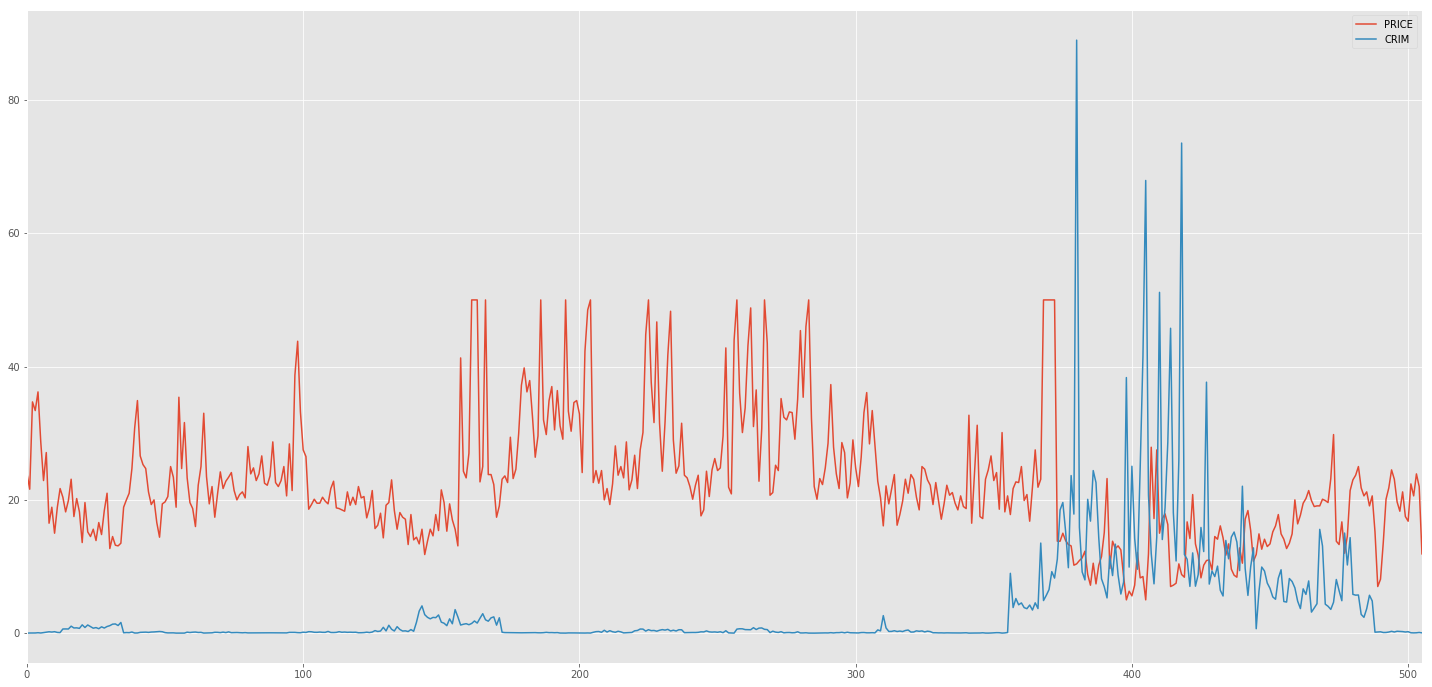

In [5]:
df[["PRICE", "CRIM"]].plot()

### Establish a Connection to SAP HANA Tenant

In [6]:
connection = pyhdb.connect(
    host=settings.HOST,
    port=settings.PORT,
    user=settings.USER,
    password=settings.PASSWORD
)

### Generate SQL for Database

In [7]:
# open cursor for DB interaction
#cursor = connection.cursor()

sql_tmpl = 'INSERT INTO "GBI_030"."gbi-student-030.data::tbl_boston_housing" VALUES({0});'

cnt = 0
for row in df.values:
    sql_load = ''
    for index in range(len(row)):
        sql_load += str(row[index]) + ','
    sql_load = sql_load[:-1]
    sql_ready = sql_tmpl.format(sql_load)
    print (sql_ready)
    cnt = cnt + 1
    # quiting the looo after 10 entries
    # remove in case this is not needed
    if cnt > 10:
        break
    
    # execute cursor
    #cursor.execute(sql_ready)
    
# free resources
#cursor.close()

INSERT INTO "GBI_030"."gbi-student-030.data::tbl_boston_housing" VALUES(0.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0);
INSERT INTO "GBI_030"."gbi-student-030.data::tbl_boston_housing" VALUES(1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6);
INSERT INTO "GBI_030"."gbi-student-030.data::tbl_boston_housing" VALUES(2.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7);
INSERT INTO "GBI_030"."gbi-student-030.data::tbl_boston_housing" VALUES(3.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4);
INSERT INTO "GBI_030"."gbi-student-030.data::tbl_boston_housing" VALUES(4.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.9,5.33,36.2);
INSERT INTO "GBI_030"."gbi-student-030.data::tbl_boston_housing" VALUES(5.0,0.02985,0.0,2.18,0.0,0.458,6.43,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7);
INSERT INTO "GBI_030"."gbi-student-030.data::tbl_boston_housing" VALUES(6.0

### Fetch Test Data from Database

In [8]:
# database schema/table

SH_SCHEMA = settings.DB_SCHEMA
SH_TABLE_NAME = settings.DB_TABLE_TEST

# open cursor for DB interaction
cursor = connection.cursor()

# specify SQL to be executed
sql = 'SELECT * FROM "{0}"."{1}"'.format(SH_SCHEMA, SH_TABLE_NAME)

print ('[i] execution following SQL\n: {0}'.format(sql))

# execute cursor
cursor.execute(sql)

# fetch data from the databsae (only first )
for index, row in enumerate(cursor.fetchall()):
    print ('[i] fetching row: {0}'.format(index))
    if index < 10:
        print(row)
    else:
        break

# close cursor
cursor.close()

[i] execution following SQL
: SELECT * FROM "GBI_DEMO"."GBI_DEMO_COUNTRY"
[i] fetching row: 0
('DE', 'D', 'Deutschland')
[i] fetching row: 1
('DE', 'E', 'Germany')
[i] fetching row: 2
('US', 'D', 'USA')
[i] fetching row: 3
('US', 'E', 'USA')


### Work with pandas

In [9]:
# database schema/table
SH_SCHEMA = settings.DB_SCHEMA
SH_TABLE_NAME = settings.DB_TABLE_TEST

# open cursor for DB interaction
cursor = connection.cursor()

# specify SQL to be executed
sql = 'SELECT * FROM "{0}"."{1}"'.format(SH_SCHEMA, SH_TABLE_NAME)

print ('[i] execution following SQL: {0}'.format(sql))

# fetch some data
cursor.execute(sql)

# create dataframe in pandas out of all data fetched from DB
df = pd.DataFrame(data = cursor.fetchall())

# close cursor
cursor.close()

[i] execution following SQL: SELECT * FROM "GBI_DEMO"."GBI_DEMO_COUNTRY"


In [10]:
df.head()

,0,1,2
0,DE,D,Deutschland
1,DE,E,Germany
2,US,D,USA
3,US,E,USA
